In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import os
project_path = os.path.expanduser('~/repos/laplace_operator_metric_graph/')
sys.path.append(project_path)
import construct_graph
from helper_functions import style_plot

%load_ext autoreload
%autoreload 2

#### Import coefficients data
#### coefficients[num_Vs][seed] is the coefficient for RGG with number of vertices = num_Vs and random seed = seed

In [5]:
with open("../data/rgg_coefficients.pkl", "rb") as file:
    coefficients = pickle.load(file)

#### Verify that coefficient calculated from scratch matches the corresponding entry in the coefficients data

In [11]:
num_Vs = 1000
seed = 6

np.random.seed(seed)
rd = construct_graph.patch_graph.RGG(num_Vs)
g = construct_graph.patch_graph.Patch(rd)
eq = construct_graph.patch_graph.Cell_Problem(g)
xi = eq.solve_corrector_equation()

coefficient, K, C = eq.construct_homogenized_tensor(xi)

print(f"calculated coefficient \t = {coefficient}")
print(f"coefficient from data \t = {coefficients[num_Vs][seed]}")

calculated coefficient 	 = 0.6503812231520848
coefficient from data 	 = 0.6503812231520848


#### Setup data for plotting

In [ ]:
coefficients_nums_Vs = np.sort(list(coefficients.keys()))
print(coefficients_nums_Vs)
coefficients_means = []
for num_Vs in coefficients_nums_Vs:
    if isinstance(coefficients[num_Vs], dict):
        data = list(coefficients[num_Vs].values())
    else:
        data = coefficients[num_Vs]
    coefficients_means.append(np.mean(data))
coefficients_means = np.array(coefficients_means)
print(coefficients_means)

cauchy_nums_Vs = coefficients_nums_Vs[:-1]
cauchy_coefficients_means = np.array([np.abs(coefficients_means[i] - coefficients_means[i + 1]) for i in range(len(coefficients_means) - 1)])

stds = []
for num_Vs in coefficients_nums_Vs:
    if isinstance(coefficients[num_Vs], dict):
        data = list(coefficients[num_Vs].values())
    else:
        data = coefficients[num_Vs]
    stds.append(np.std(data))
stds = np.array(stds)
 
cauchy_stds = np.array([np.abs(stds[i] + stds[i + 1]) for i in range(len(stds) - 1)])
x = cauchy_nums_Vs
y = cauchy_coefficients_means
dy = cauchy_stds
y_ratio_upper = y * (1 + dy / y) 
y_ratio_lower = y / (1 + dy / y)  
y_err_upper = (y_ratio_upper - y)
y_err_lower = (y - y_ratio_lower)

### Plot

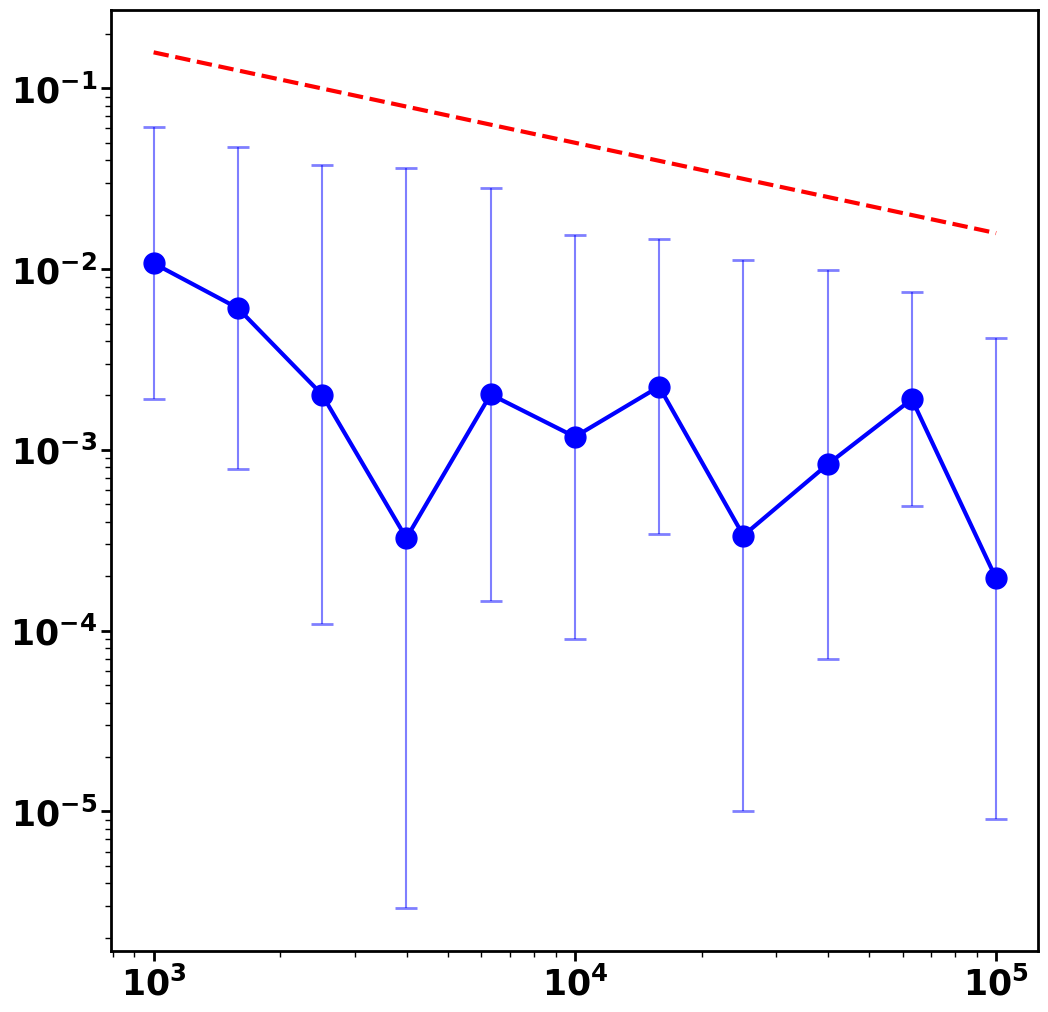

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 15

ax.errorbar(x, y, yerr=[y_err_lower, y_err_upper], capsize=8, capthick=2, c='b', alpha=0.5, zorder=0)

ax.loglog(x, y, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(x, x**(-0.5) * 5, '--', c='r', linewidth=eigenvalue_linewidth)

style_plot(fig, ax, aspect=None)

plt.show()